In [ ]:
#Crop and Fertilizer Recommendation System - Case Study
#Context
    #Agriculture plays a crucial role in food security and economic stability. Selecting the right crop based on soil and climate conditions can significantly enhance yield and sustainability. This dataset is designed to assist in recommending suitable crops and fertilizers based on key soil and environmental parameters.

#Problem Statement
    #Develop a machine learning model to accurately predict the most suitable crop and recommend appropriate fertilizers based on soil composition and climatic conditions.

#Dataset Description
    #The dataset contains various agricultural parameters as predictor variables and a target variable, "label", which represents the recommended crop.

#Predictor Variables

#N (Nitrogen):
    #Nitrogen content in the soil (measured in mg/kg).

#P (Phosphorus):
    #Phosphorus content in the soil (measured in mg/kg).

#K (Potassium):
    #Potassium content in the soil (measured in mg/kg).

#Temperature:
    #Atmospheric temperature (in degrees Celsius).

#Humidity:
    #Relative humidity in percentage (%).

#pH:
#Soil pH level (indicating soil acidity or alkalinity).

#Rainfall:
#Annual rainfall (in mm).


#Target Variable
#Label (Crop Type):
#The recommended crop for cultivation based on soil and climate conditions.
#Includes multiple crop categories such as rice, wheat, maize, mango, apple, coffee, cotton, and more.
#Potential Additional Feature


#Fertilizer Recommendation:
#Based on soil deficiencies, a model could suggest appropriate fertilizers (Nitrogen, Phosphorus, Potassium-based).

In [1]:
# Import necessary libraries for data analysis and visualization

import numpy as np  # NumPy: Used for numerical computations and handling arrays
import pandas as pd  # Pandas: Used for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib: Used for creating static, animated, and interactive plots
import seaborn as sns  # Seaborn: Statistical data visualization library built on top of Matplotlib


In [3]:
# Function to load data from a CSV file
def load_data(file_path):
    """Load dataset from a given file path and handle file not found errors."""
    try:
        data = pd.read_csv(file_path)  # Read the CSV file into a Pandas DataFrame
        print("Data loaded successfully!")  # Print confirmation message if successful
        return data  # Return the loaded DataFrame
    except FileNotFoundError:  
        # Handle the case where the file is not found
        print("The file was not found. Please check the file path.")  
        return None  # Return None if file loading fails

# Example usage of the function
file_path = r'Crop_recommendation.csv'  # Define the file path (using raw string format for compatibility)
crop_data = load_data(file_path)  # Call the function to load the dataset


Data loaded successfully!


In [5]:
# Function to analyze the dataset
def analyze_data(data):
    """Perform basic exploratory data analysis (EDA) on the dataset."""
    
    if data is not None:  # Check if the dataset is loaded properly
        # Display the first few rows of the dataset
        print("\nDataset Preview (Head):")
        print(data.head())  

        # Display the last few rows of the dataset
        print("\nDataset Preview (Tail):")
        print(data.tail())  

        # Display dataset structure, column names, non-null values, and data types
        print("\nDataset Information:")
        data.info()  

        # Check for missing values in each column
        print("\nMissing Values in the Dataset:")
        print(data.isnull().sum())  

        # Check for duplicate rows in the dataset
        print("\nNumber of Duplicate Rows in the Dataset:")
        print(data.duplicated().sum())  

        # Display summary statistics (mean, standard deviation, min, max, etc.)
        print("\nDescriptive Statistics of the Dataset:")
        print(data.describe())  

        # Display column names in the dataset
        print("\nColumn Names in the Dataset:")
        print(data.columns)  

    else:
        print("No data to analyze.")  # Handle cases where the dataset is not loaded

# Call the function to analyze the dataset
analyze_data(crop_data)



Dataset Preview (Head):
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Preview (Tail):
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 colu

In [7]:
# Function to visualize missing data using a heatmap
def visualize_missing_data(data):
    """Visualize missing data in the dataset using a heatmap."""
    
    # Check if there are any missing values in the dataset
    if data.isnull().sum().sum() == 0:  
        print("No missing data in the dataset.")  # Inform the user if there are no missing values
    else:
        # Set figure size for better visibility
        plt.figure(figsize=(10, 6))  

        # Create a heatmap where missing values are represented visually
        sns.heatmap(data.isnull(), cbar=False, cmap="viridis", linewidths=0.5)  

        # Add title to the heatmap
        plt.title("Missing Data Heatmap")  

        # Display the heatmap
        plt.show()  

# Check and print missing data count per column
print("Missing data count per column:")
print(crop_data.isnull().sum())  

# Call the function to visualize missing data
visualize_missing_data(crop_data)


Missing data count per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
No missing data in the dataset.


In [9]:
# Function to analyze value counts of a specific column
def analyze_column(data, column_name):
    """Analyze the frequency of unique values in a specified column."""
    
    # Check if the column exists in the dataset
    if column_name in data.columns:  
        print(f"\nValue Counts in the '{column_name}' Column:")
        
        # Display the count of unique values in the specified column
        print(data[column_name].value_counts())  
    else:
        # Inform the user if the specified column is not found
        print(f"Column '{column_name}' not found in the dataset.")  

# Analyze the frequency of each unique crop in the 'label' column
analyze_column(crop_data, 'label')  # Change 'label' to any other column if needed



Value Counts in the 'label' Column:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [11]:
#Extract feature columns (excluding 'label')
features = crop_data.columns.to_list()
if 'label' in features:
    features.remove('label')

print("\n Feature Columns:", features)


 Feature Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [13]:
# 📌 Function to visualize missing data
def visualize_missing_data(data):
    """Visualize missing data as a heatmap."""
    
    # Print missing values count per column
    print("\n📊 Missing Data Count per Column:")
    print(data.isnull().sum())

    # Check if there is any missing data
    if data.isnull().sum().sum() == 0:
        print("✅ No missing data found.")
    else:
        plt.figure(figsize=(10, 6))
        sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm", linewidths=0.5)
        plt.title("🔥 Missing Data Heatmap")
        plt.show()

# Visualizing missing data
visualize_missing_data(crop_data)


📊 Missing Data Count per Column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
✅ No missing data found.


In [15]:
# 📌 Function to analyze value counts of a specific column
def analyze_column(data, column_name):
    """Analyze the frequency distribution of a specific column."""
    if column_name in data.columns:
        print(f"\n📊 Value Counts in '{column_name}' Column:")
        print(data[column_name].value_counts())
    else:
        print(f"⚠ Column '{column_name}' not found.")

# Analyze value counts of the 'label' column
analyze_column(crop_data, 'label')


📊 Value Counts in 'label' Column:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [17]:
# 📌 Extract feature columns (excluding 'label')
features = crop_data.columns.to_list()
if 'label' in features:
    features.remove('label')

print("\n✅ Feature Columns:", features)


✅ Feature Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


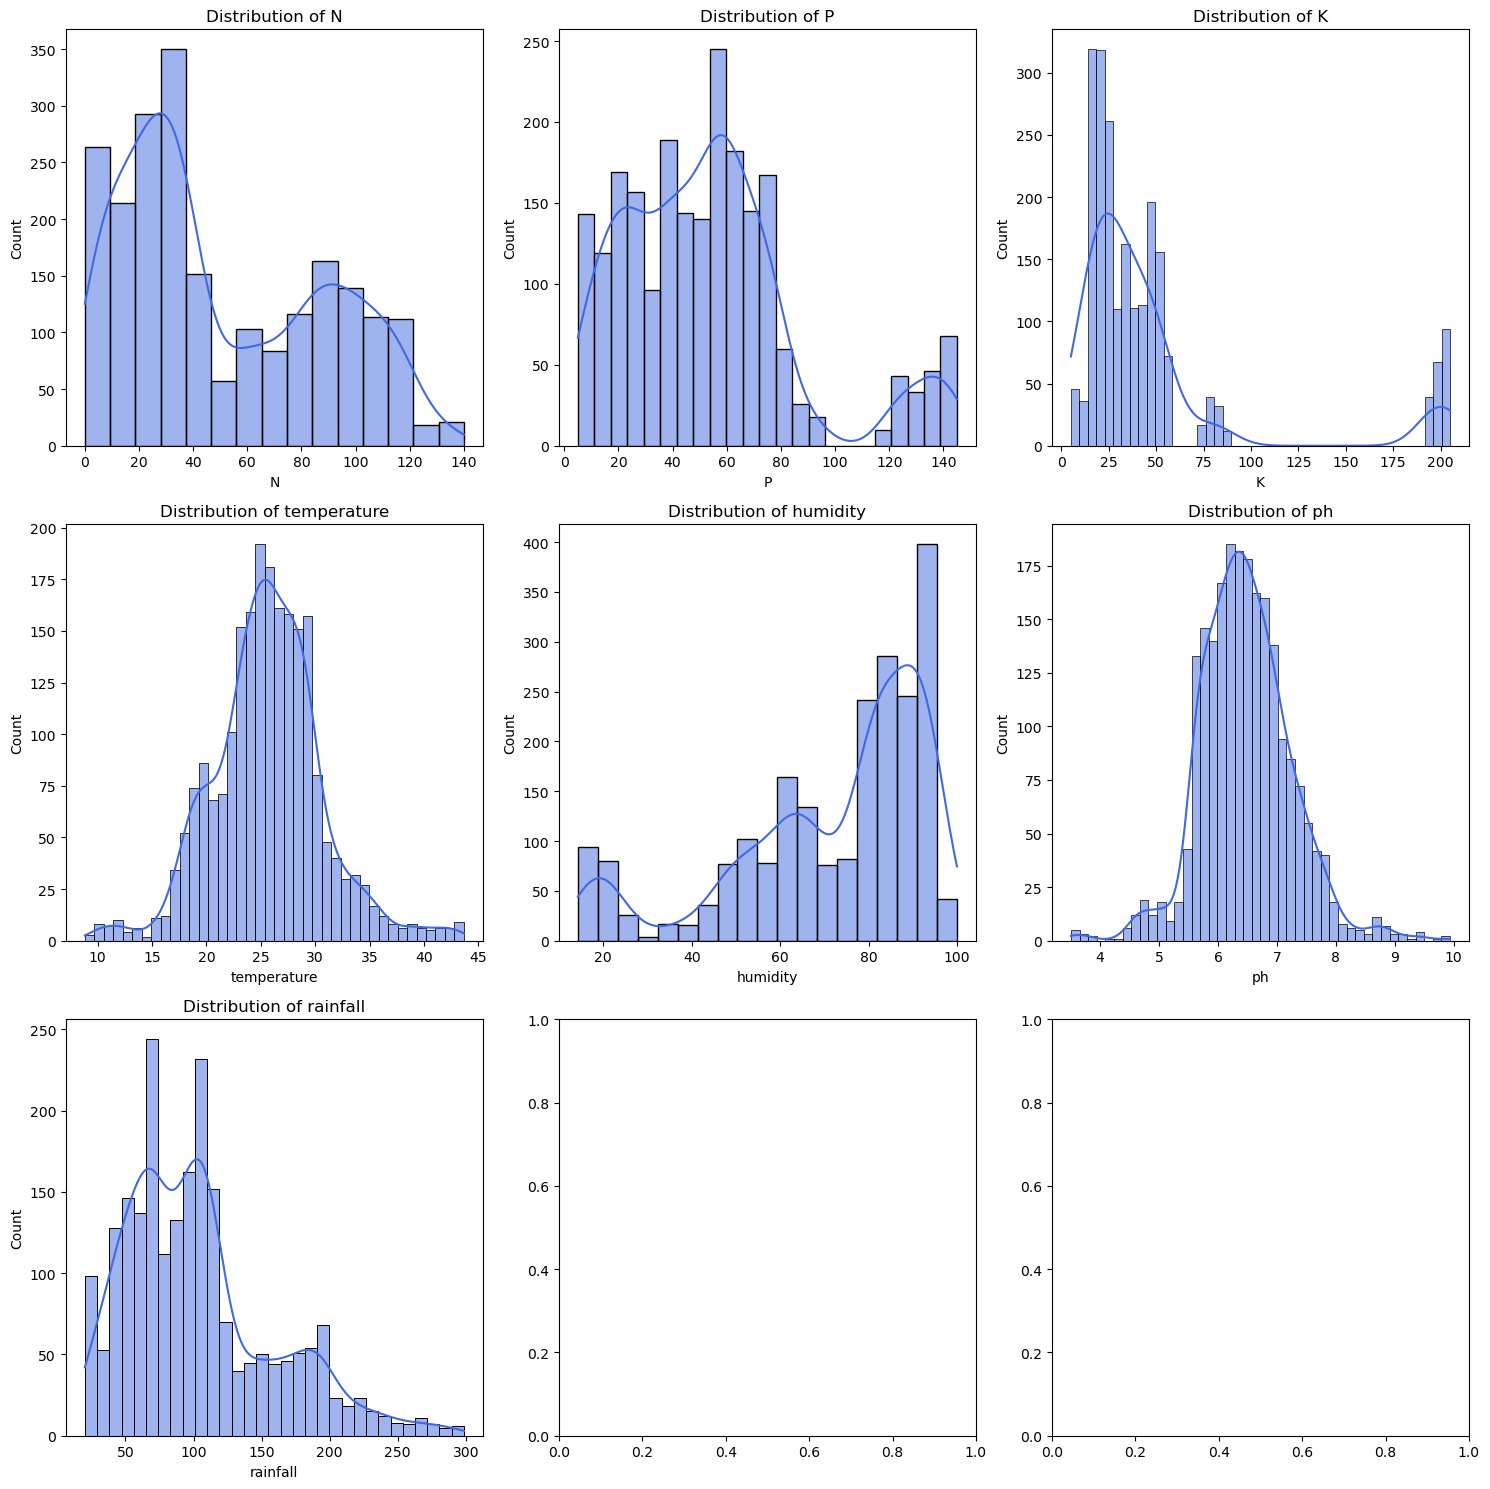

In [19]:
# 📌 1️⃣ Visualizing Feature Distributions
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.histplot(crop_data[feature], ax=subplot, kde=True, color='royalblue')
    subplot.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

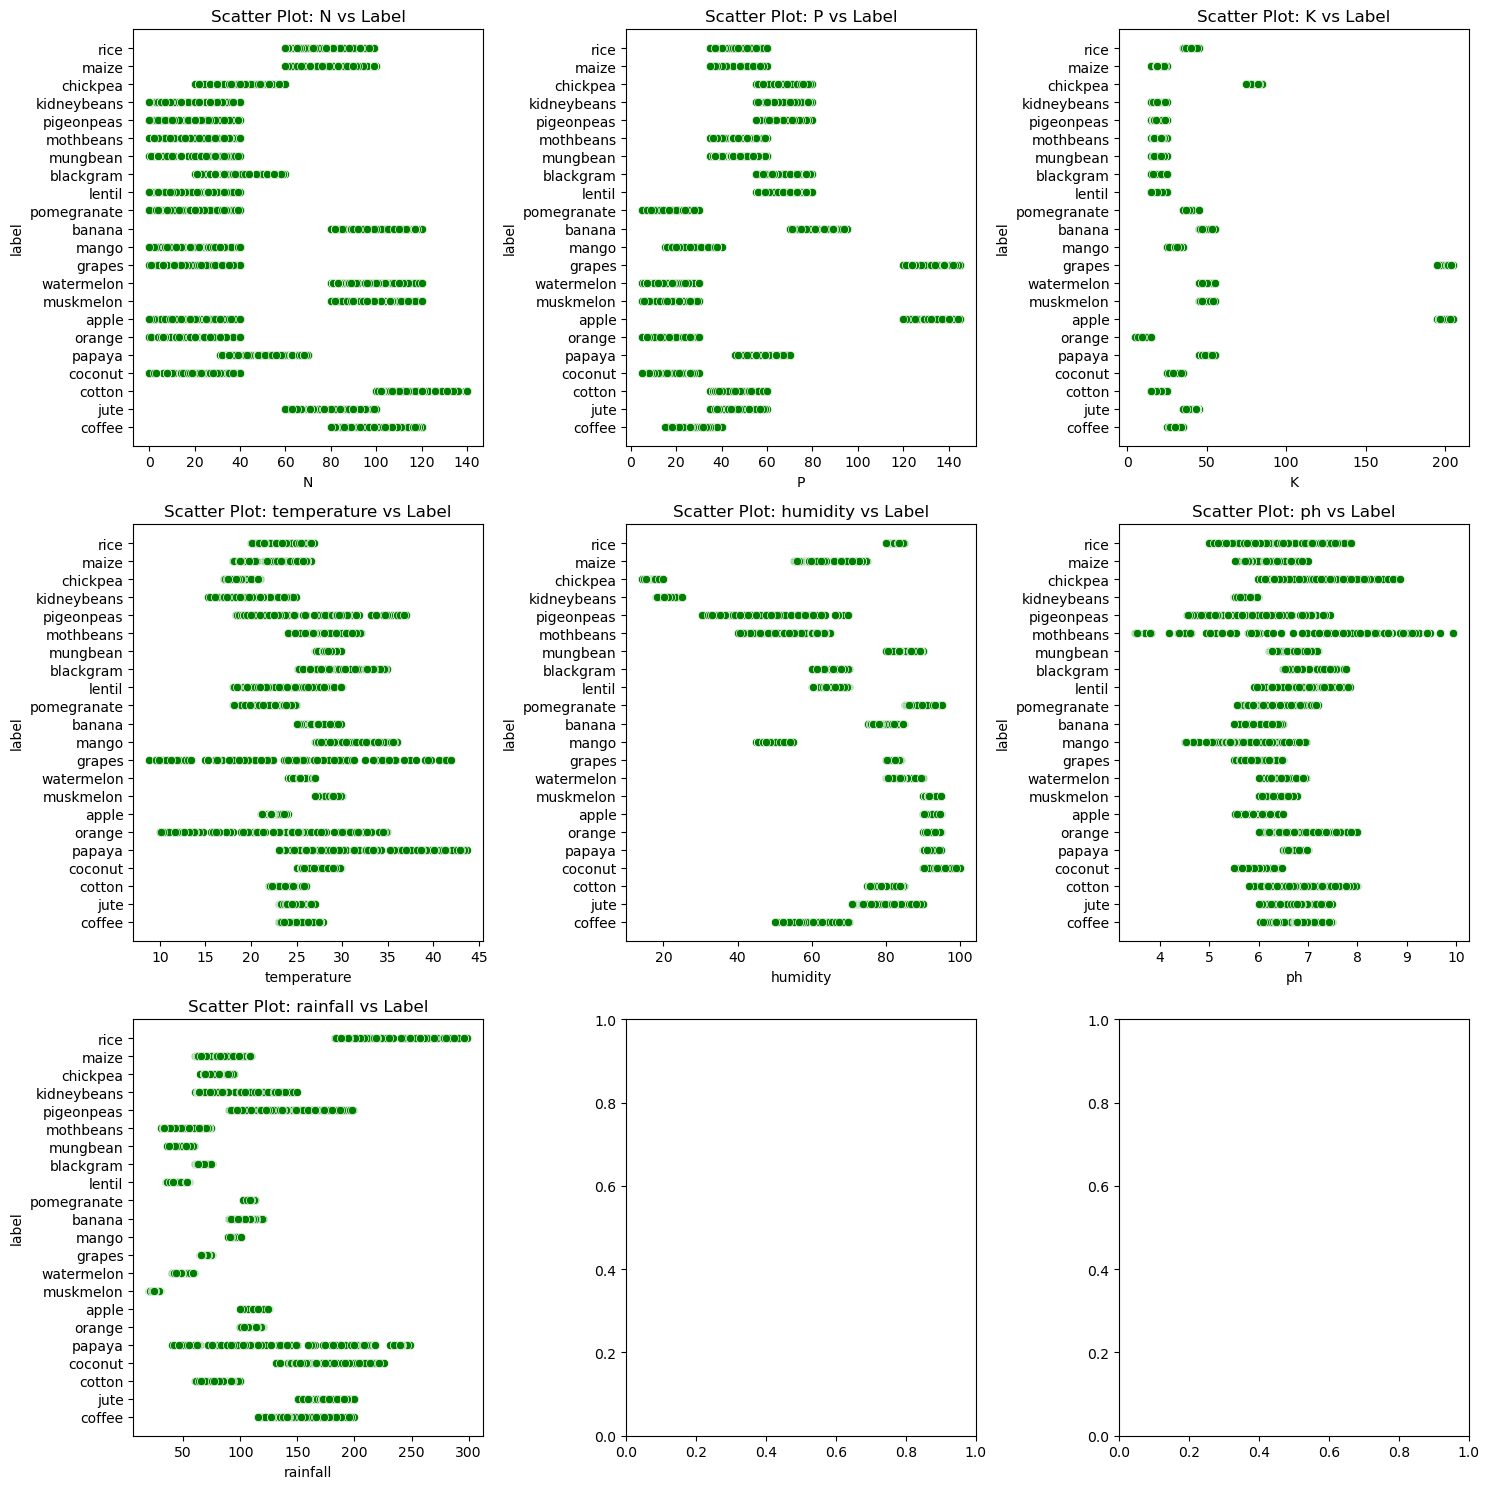

In [21]:
# 📌 2️⃣ Scatter Plots: Feature vs Label
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=feature, y='label', data=crop_data, ax=subplot, color='green')
    subplot.set_title(f'Scatter Plot: {feature} vs Label')
plt.tight_layout()
plt.show()

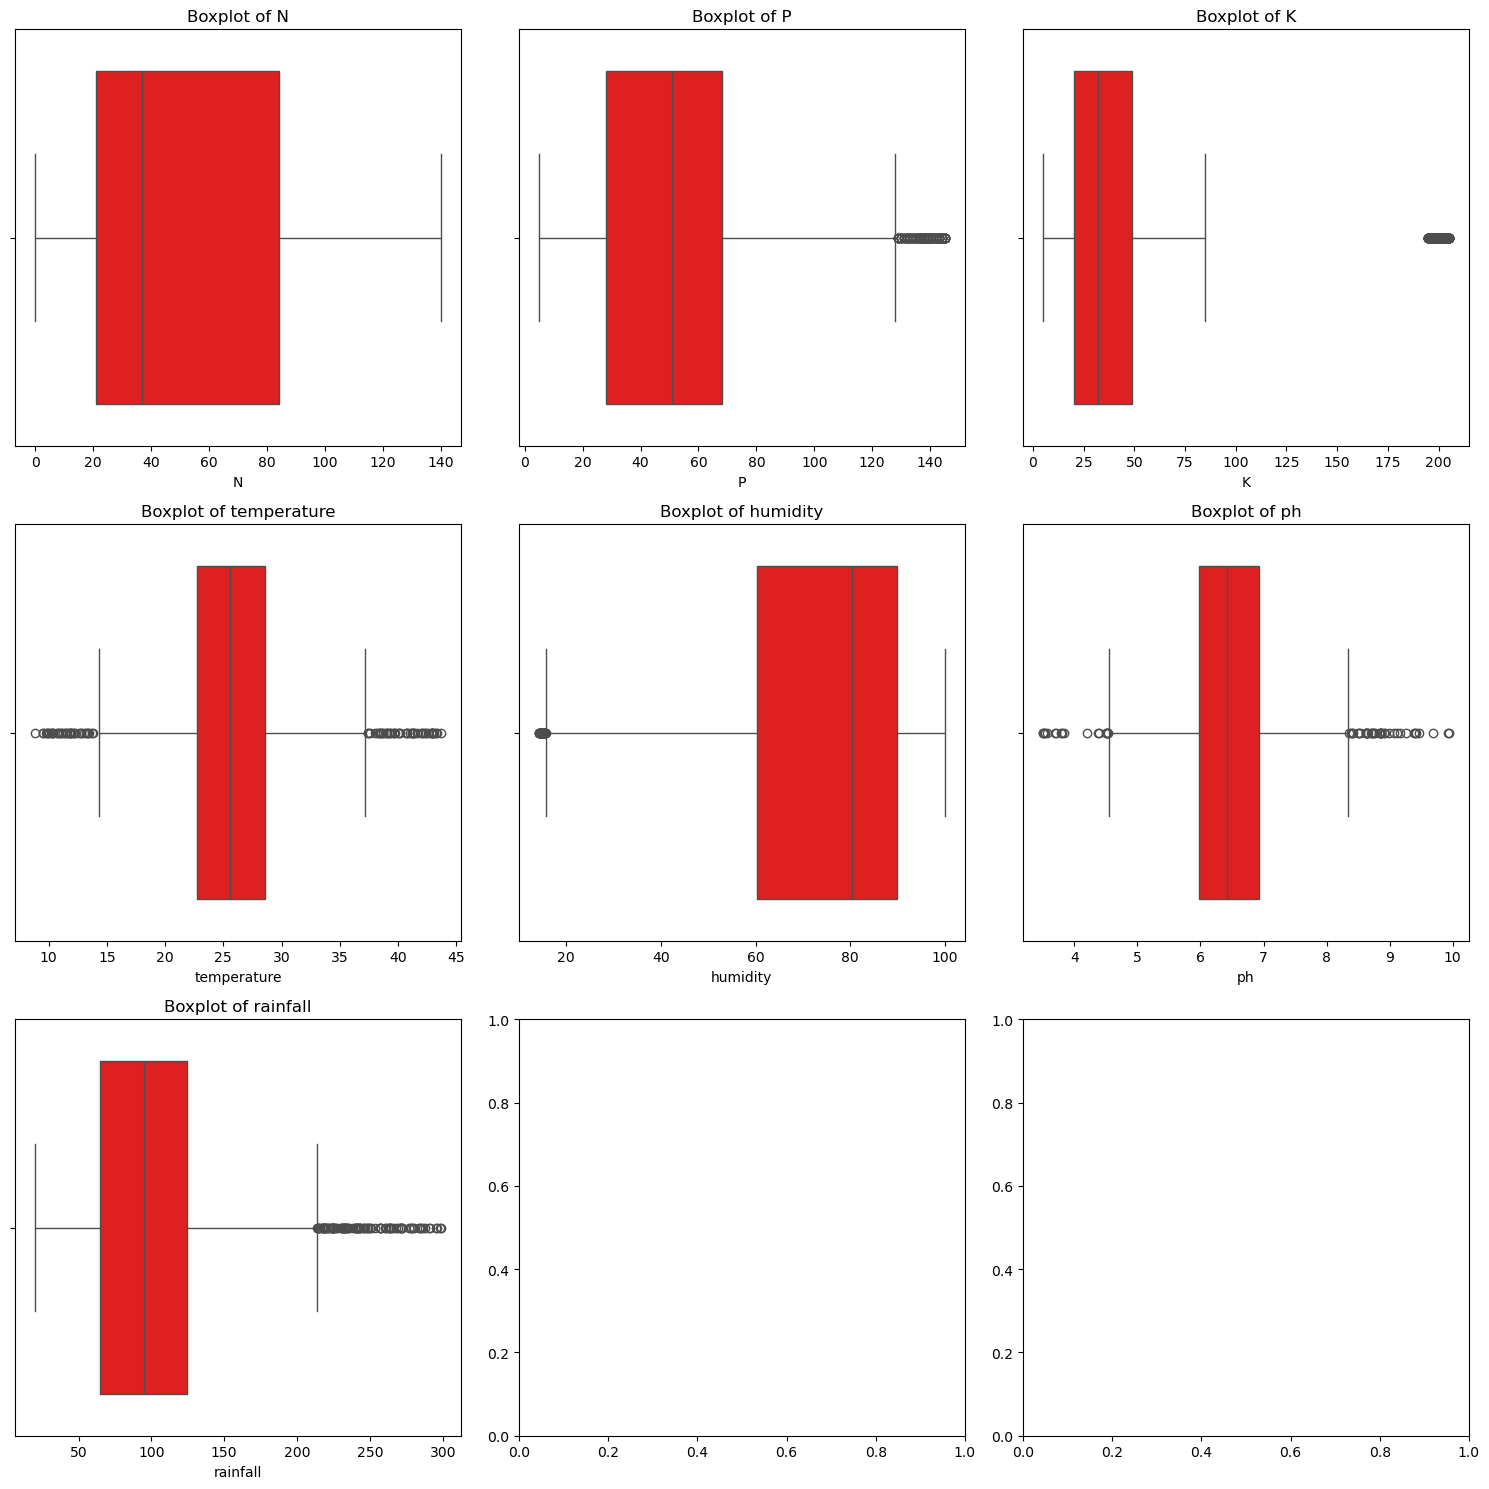

In [23]:
# 📌 3️⃣ Detecting Outliers Using Boxplots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for feature, subplot in zip(features, ax.flatten()):
    sns.boxplot(x=crop_data[feature], ax=subplot, color='red')
    subplot.set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

📊 Numerical Features (num_cols):
         N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

🔍 Correlation Matrix:
                     N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096

C:\Users\anjal\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


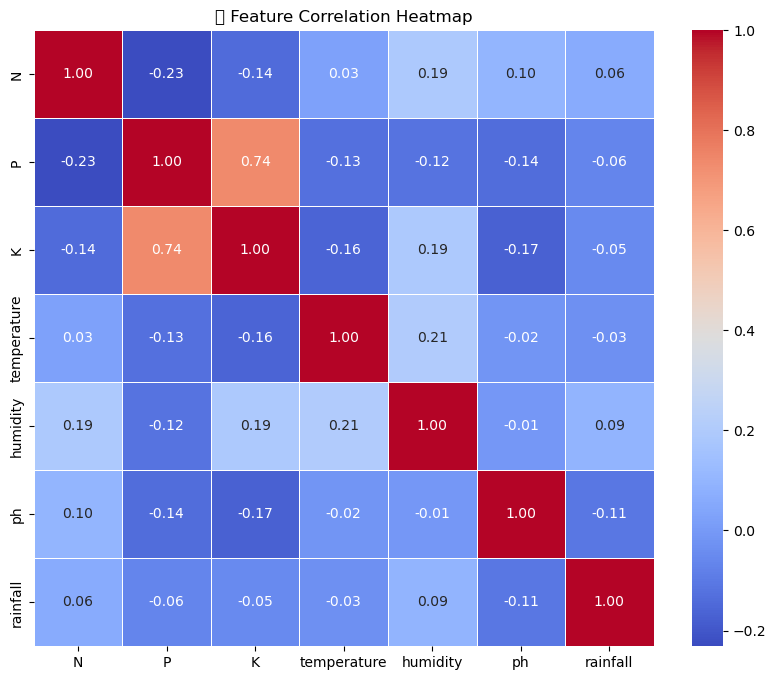

In [25]:
# 📌 4️⃣ Feature Correlation Analysis

# Selecting only numerical columns for correlation
num_cols = crop_data.select_dtypes(include=[np.number])  # Subset of numerical features
print("📊 Numerical Features (num_cols):\n", num_cols)  # Output the numerical features

# Compute correlation matrix
corr_matrix = num_cols.corr()  # Correlation matrix between numerical features
print("\n🔍 Correlation Matrix:\n", corr_matrix)  # Output the correlation matrix

# Visualizing Correlation with Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📈 Feature Correlation Heatmap")
plt.show()

In [27]:
# 📌 5️⃣ Encoding the Target Variable ('label')
if 'label' in crop_data.columns:
    # Check unique labels in the 'label' column
    print("\n📝 Unique Labels in 'label' Column:", crop_data['label'].nunique())

    # Creating a dictionary for encoding the labels (Mapping label to numeric value)
    crop_dict = {label: idx for idx, label in enumerate(crop_data['label'].unique())}
    print("\n🔑 Label Encoding Dictionary:", crop_dict)

    # Mapping the 'label' column to a new 'crop_no' column
    crop_data['crop_no'] = crop_data['label'].map(crop_dict)
    print("\n💡 Dataset after Mapping 'label' to 'crop_no':")
    print(crop_data.head())  # Displaying first few rows

    # Dropping the original 'label' column
    crop_data.drop('label', axis=1, inplace=True)
    print("\n🗑️ Dataset after Dropping 'label' Column:")
    print(crop_data.head())  # Displaying first few rows after dropping 'label'

    # Display final dataset after encoding
    print("\n✅ Final Dataset after Encoding:")
    print(crop_data.tail())  # Displaying last few rows to verify the encoding
else:
    print("⚠ 'label' column not found. Please ensure that the column is present in the dataset.")


📝 Unique Labels in 'label' Column: 22

🔑 Label Encoding Dictionary: {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}

💡 Dataset after Mapping 'label' to 'crop_no':
    N   P   K  temperature   humidity        ph    rainfall label  crop_no
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice        0
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice        0
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice        0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice        0
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice        0

🗑️ Dataset after Dropping 'label' Column:
    N   P   K  temperature   humidity        ph    rainfall  crop_n